In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("jre.csv")
df = df.drop(columns=["Unnamed: 0"])

In [3]:
df.head(5)

,pod_num,guest,transcript
0,1104,Boyan Slat,"Ladies and gentlemen, welcome to the show. Ho..."
1,1105,Michael Hunter,"Hey everybody, how the fuck are ya? Huh? Huh?..."
2,1106,Colion Noir,hey ladies gentlemen how's the thing this epi...
3,1107,Sam Harris & Maajid Nawaz,hey you friends what's going on this episode ...
4,1108,Peter Attia,late and gentlemen how's everyone doing I'm d...


In [4]:
len(df)

280

## Guests

In [5]:
guests = df.groupby("guest").size()
reocurring_guests = guests.where(guests > 1).dropna()
reocurring_guests.sort_values(ascending=False)

guest
Tom Papa              4.0
Tim Dillon            4.0
Mike Baker            4.0
Tony Hinchcliffe      3.0
Lex Fridman           3.0
Theo Von              3.0
Duncan Trussell       3.0
Joey Diaz             3.0
Tom Green             2.0
Tim Pool              2.0
Tim Kennedy           2.0
Steven Rinella        2.0
Peter Schiff          2.0
Nikki Glaser          2.0
Mike Tyson            2.0
Andrew Santino        2.0
Kyle Dunnigan         2.0
Andrew Schulz         2.0
Gad Saad              2.0
Dr. Rhonda Patrick    2.0
Dr. Debra Soh         2.0
Donnell Rawlings      2.0
Colion Noir           2.0
Cameron Hanes         2.0
Brian Redban          2.0
Brendan Schaub        2.0
Bill Burr             2.0
Ben Greenfield        2.0
Jordan Peterson       2.0
dtype: float64

In [6]:
def get_greeting(greeting):
    if "gentlemen" in greeting or "ladies" in greeting:
        return "ladies and gentlemen"
    elif "friends" in greeting:
        return "friends"
    elif "everybody" in greeting:
        return "everybody"
    elif "folks" in greeting:
        return "folks"
    else:
        return "other"

In [7]:
df["greeting"] = df["transcript"].str[:50]
df["greeting_name"] = df["greeting"].apply(get_greeting)

<AxesSubplot:xlabel='greeting_name'>

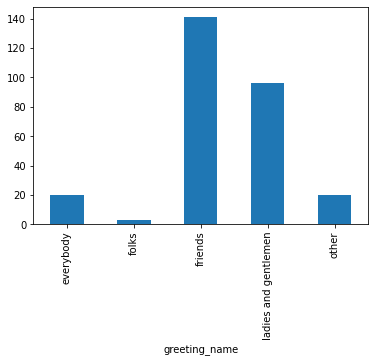

In [8]:
df.groupby("greeting_name").size().plot.bar()

In [9]:
df[df["greeting"].str.contains("motherfuking")]["greeting"]

7       this episode of the motherfuking podcast my c...
89      this episode of the motherfuking pop. Brought...
91      this episode of the motherfuking podcast is b...
102     it's the day before motherfuking Thanksgiving...
Name: greeting, dtype: object

In [10]:
for greeting in df[df["greeting_name"] == "other"]["greeting"]:
    print(greeting)

 this episode is brought to you by Onnit most of t
 this episode of the motherfuking podcast my compa
 Yo Boise Idaho we're coming to town baby! June 30
 I'm taking this show on the Madison area I can't 
 beautiful people of the world hi how you doing go
 he you fuckers Toronto oh shit Toronto coming in 
 hey Boise Idaho and other people but I'm going to
 hey buddy I got a bunch of tour dates coming up a
 I'm going to Tucson on Friday in Boise on Saturda
 I'm back I had to go I had to take some time off 
 raise in Toronto September 29th I've said this a 
 this episode of the podcast is brought to you by 
 this episode of the podcast is brought to you by 
 Netflix You Beautiful bastards Joey Diaz specials
 this episode of the motherfuking pop. Brought to 
 this episode of the motherfuking podcast is broug
 it's the day before motherfuking Thanksgiving and
 this episode of the podcast is brought to you by 
 Bishop so the podcast is brought to you by Square
   they  fit like designer jean

### TODO
- always compare results across different data sets, with/without ads, spell check, etc
- create df run spell check to correct speech to text errors
- create df without ads in transcripts
- sentiment analysis

## Guests
- check profanity on each pod, probability of entire transcript, then number of sentences with prob > .5

In [11]:
from profanity_check import predict, predict_prob

In [22]:
df["profanity_pred"] = df["transcript"].apply(lambda s: [s]).apply(predict).apply(bool)
df["profanity_prob"] = df["transcript"].apply(lambda s: [s]).apply(predict_prob)

,guest,profanity_prob,profanity_pred
20,Robert Schoch,[0.00019790937154024992],False
246,Brian Muraresku & Graham Hancock,[0.00153465072474582],False
71,Chris Kresser & Dr. Joel Kahn,[0.0017442293476518731],False
111,Sir Roger Penrose,[0.0023878808165375917],False
128,Brian Cox,[0.0026294748018217224],False
...,...,...,...
115,Joey Diaz,[0.9999983703826889],True
44,Andrew Santino,[0.9999990169487569],True
79,Andrew Santino,[0.9999993168867961],True
36,Joey Diaz,[0.9999999105362303],True


In [23]:
df[["guest","profanity_prob", "profanity_pred"]].sort_values("profanity_prob")

,guest,profanity_prob,profanity_pred
20,Robert Schoch,[0.00019790937154024992],False
246,Brian Muraresku & Graham Hancock,[0.00153465072474582],False
71,Chris Kresser & Dr. Joel Kahn,[0.0017442293476518731],False
111,Sir Roger Penrose,[0.0023878808165375917],False
128,Brian Cox,[0.0026294748018217224],False
...,...,...,...
115,Joey Diaz,[0.9999983703826889],True
44,Andrew Santino,[0.9999990169487569],True
79,Andrew Santino,[0.9999993168867961],True
36,Joey Diaz,[0.9999999105362303],True


<AxesSubplot:xlabel='profanity_pred'>

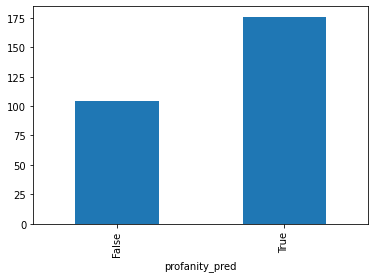

In [33]:
df.groupby("profanity_pred").size().plot.bar()

### Resources
#### Profanity
- https://towardsdatascience.com/building-a-better-profanity-detection-library-with-scikit-learn-3638b2f2c4c2
- https://github.com/vzhou842/profanity-check